# CEIDG - data analysis

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

## Load and clear data

In [55]:
surv_df = pd.read_csv('ceidg_data_surv.csv')
surv_df['YearOfStartingOfTheBusiness'] = pd.to_datetime(surv_df['YearOfStartingOfTheBusiness'],format='%Y')
surv_df['DateOfStartingOfTheBusiness'] = pd.to_datetime(surv_df['DateOfStartingOfTheBusiness'],format='%Y-%m-%d')
surv_df['DateOfTermination'] = pd.to_datetime(surv_df['DateOfTermination'],format='%Y-%m-%d')
surv_df.head()

,Status,YearOfStartingOfTheBusiness,DateOfStartingOfTheBusiness,DateOfTermination,Terminated,DurationOfExistenceInMonths,MainAddressVoivodeship,MainAddressCounty,MainAddressTERC,CorrespondenceAddressVoivodeship,...,HasPolishCitizenship,ShareholderInOtherCompanies,PKDMainSection,PKDMainDivision,PKDMainGroup,PKDMainClass,NoOfUniquePKDSections,NoOfUniquePKDDivsions,NoOfUniquePKDGroups,NoOfUniquePKDClasses
0,Aktywny,2011-01-01,2011-10-12,NaT,0,98,DOLNOŚLĄSKIE,WROCłAWSKI,223052.0,DOLNOŚLĄSKIE,...,True,False,M,70.0,702.0,7022.0,2,3,5,6
1,Wykreślony,2011-01-01,2011-01-01,2015-08-06,1,55,MAZOWIECKIE,WARSZAWA,1465078.0,MAZOWIECKIE,...,True,False,F,43.0,432.0,4322.0,1,1,1,1
2,Wykreślony,2011-01-01,2011-06-01,2017-06-29,1,72,MAZOWIECKIE,WARSZAWA,1465011.0,MAZOWIECKIE,...,True,False,Q,86.0,862.0,8623.0,1,1,2,2
3,Wykreślony,2011-01-01,2011-12-15,2014-12-19,1,36,MAZOWIECKIE,WARSZAWA,1465078.0,MAZOWIECKIE,...,True,False,F,43.0,432.0,4321.0,2,2,2,2
4,Wykreślony,2011-01-01,2011-02-01,2012-03-06,1,13,MAZOWIECKIE,WARSZAWA,1465108.0,MAZOWIECKIE,...,True,False,G,47.0,479.0,4791.0,2,3,5,7


In [96]:
surv_df.groupby('MainAddressVoivodeship').size()

MainAddressVoivodeship
dolnośląskie           22946
kujawsko-pomorskie     15257
lubelskie              12838
lubuskie                7976
mazowieckie            44788
małopolskie            25201
opolskie                5879
podkarpackie           11686
podlaskie               7730
pomorskie              20669
warmińsko-mazurskie     9322
wielkopolskie          27098
zachodniopomorskie     16297
łódzkie                17419
śląskie                29225
świętokrzyskie          8033
dtype: int64

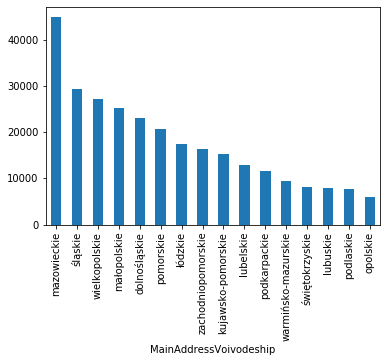

In [57]:
polish_voivodeship = [
    'dolnośląskie',
    'kujawsko-pomorskie',
    'lubelskie',
    'lubuskie',
    'łódzkie',
    'małopolskie',
    'mazowieckie',
    'opolskie',
    'podkarpackie',
    'podlaskie',
    'pomorskie',
    'śląskie',
    'świętokrzyskie',
    'warmińsko-mazurskie',
    'wielkopolskie',
    'zachodniopomorskie'
]
surv_df.MainAddressVoivodeship = surv_df.MainAddressVoivodeship.str.lower()
surv_df = surv_df[surv_df.MainAddressVoivodeship.isin(polish_voivodeship)]
surv_df\
    .groupby('MainAddressVoivodeship') \
    .size() \
    .sort_values(ascending=False) \
    .plot.bar()


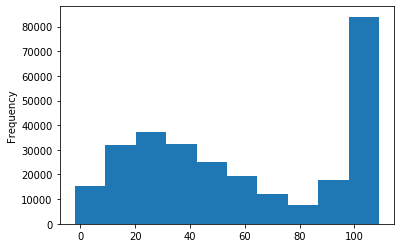

In [58]:
surv_df['DurationOfExistenceInMonths'].plot.hist(bins=10)

In [77]:
surv_removed_df = surv_df[surv_df['Terminated'] == 1]

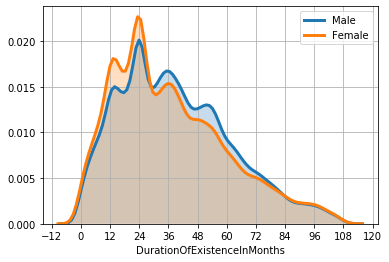

In [78]:
sex = ['M','F']
long_name={'M':'Male', 'F':'Female'}
for s in sex:
    subset = surv_removed_df[surv_removed_df['Sex'] == s] 
    ax = sns.distplot(subset['DurationOfExistenceInMonths'],hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label=long_name[s])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
    ax.grid(True)

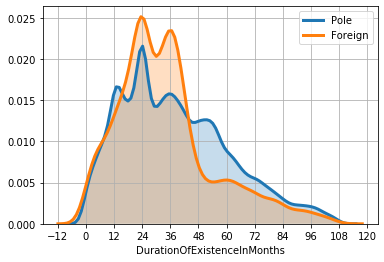

In [81]:
HasPolishCitizenship = [True,False]
long_name={True:'Pole', False:'Foreign'}
for b in HasPolishCitizenship:
    subset = surv_removed_df[surv_removed_df['HasPolishCitizenship'] == b] 
    ax = sns.distplot(subset['DurationOfExistenceInMonths'],hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label=long_name[b])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
    ax.grid(True)

In [97]:
surv_df.groupby('HasPolishCitizenship').size()

HasPolishCitizenship
False     12990
True     269374
dtype: int64

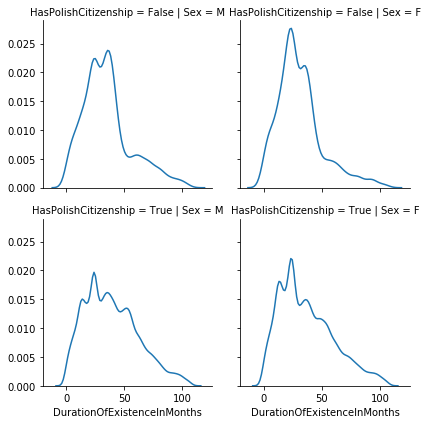

In [80]:
g = sns.FacetGrid(surv_removed_df, col="Sex", row='HasPolishCitizenship')
g = g.map(sns.distplot, "DurationOfExistenceInMonths",hist=False)

Text(0.5, 1.0, 'Shareholder In Other Companies')

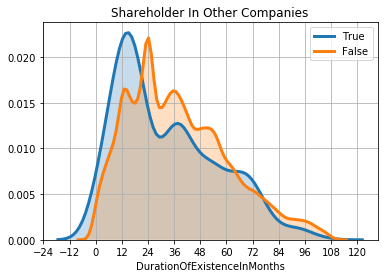

In [84]:
ShareholderInOtherCompanies = [True,False]
for b in ShareholderInOtherCompanies:
    subset = surv_removed_df[surv_removed_df['ShareholderInOtherCompanies'] == b] 
    ax = sns.distplot(subset['DurationOfExistenceInMonths'],hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label=b)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
    ax.grid(True)
plt.title('Shareholder In Other Companies')

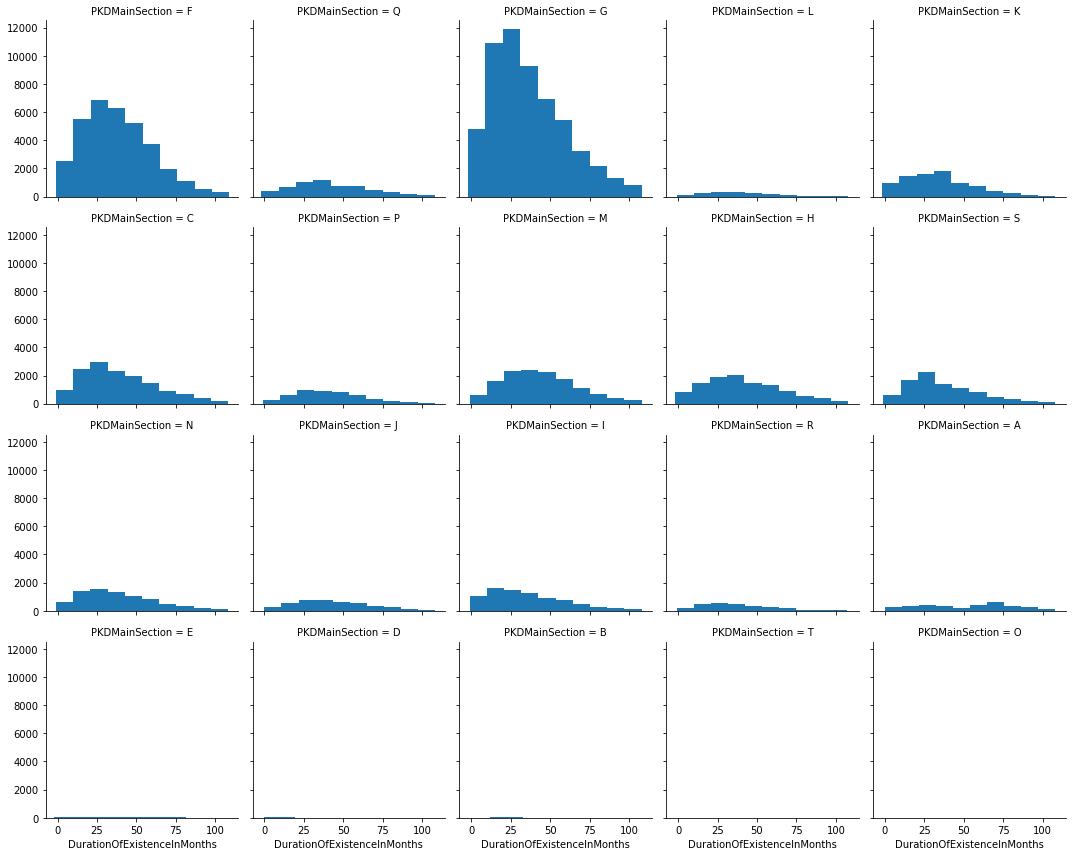

In [88]:
g = sns.FacetGrid(surv_removed_df, col='PKDMainSection', col_wrap=5)
g = g.map(plt.hist, "DurationOfExistenceInMonths")

C:\Users\WilyLynx\.conda\envs\Data-analysis\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


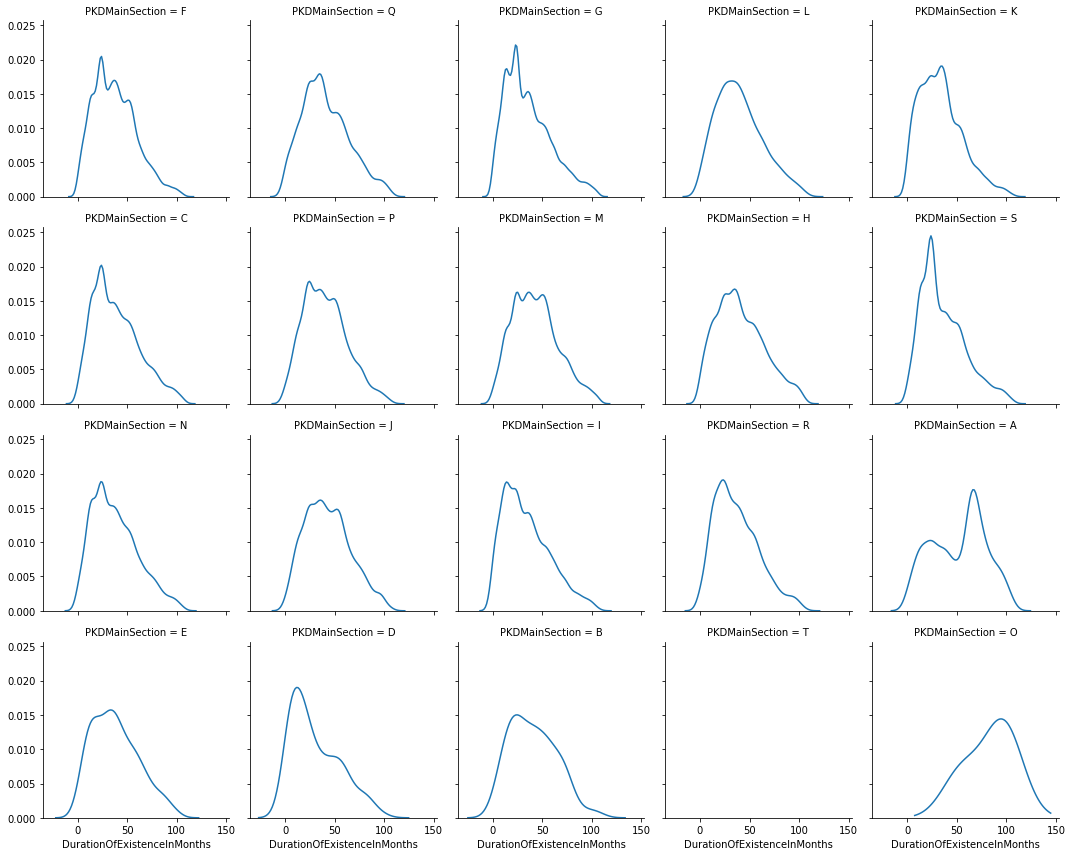

In [91]:
g = sns.FacetGrid(surv_removed_df, col='PKDMainSection', col_wrap=5)
g = g.map(sns.distplot, "DurationOfExistenceInMonths", hist=False)

In [99]:
min_year = min(surv_removed_df['DateOfTermination'].dt.year)
print(min_year)
max_year = max(surv_removed_df['DateOfTermination'].dt.year)
print(max_year)

2011
2020


In [114]:
surv_removed_df.loc[:,'YearOfTermination'] = surv_removed_df['DateOfTermination'].dt.year
pd.DataFrame({'count': surv_removed_df.groupby(["YearOfTermination", "PKDMainSection"]).size()}).reset_index()

,YearOfTermination,PKDMainSection,count
0,2011,A,140
1,2011,B,2
2,2011,C,426
3,2011,D,8
4,2011,E,20
...,...,...,...
177,2020,N,29
178,2020,P,14
179,2020,Q,33
180,2020,R,1


In [118]:
terminated_year_PDK_df[terminated_year_PDK_df['YearOfTermination'] == 2012]

,YearOfTermination,PKDMainSection,count
18,2012,A,363
19,2012,B,25
20,2012,C,2442
21,2012,D,48
22,2012,E,99
23,2012,F,5746
24,2012,G,11652
25,2012,H,1714
26,2012,I,1788
27,2012,J,543
